In [4]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
np.random.seed(0)
train_indices = np.random.choice(60000, 50000, replace=False)
valid_indices = [i for i in range(60000) if i not in train_indices]
X_valid, y_valid = X_train[valid_indices,:,:], y_train[valid_indices]
X_train, y_train = X_train[train_indices,:,:], y_train[train_indices]
print(X_train.shape, X_valid.shape, X_test.shape)

image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:, None]).astype(np.float32)
    return dataset, labels

X_train, y_train = reformat(X_train, y_train)
X_valid, y_valid = reformat(X_valid, y_valid)
X_test, y_test = reformat(X_test, y_test)
print('Training set', X_train.shape, X_train.shape)
print('Validation set', X_valid.shape, X_valid.shape)
print('Test set', X_test.shape, X_test.shape)

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

batch_size = 256
num_hidden_units = 1024
lambda1 = 0.1
lambda2 = 0.1
graph = tf.Graph()
with graph.as_default():
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(X_valid)
    tf_test_dataset = tf.constant(X_test)
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, num_hidden_units]))
    biases1 = tf.Variable(tf.zeros([num_hidden_units]))
    layer_1_outputs = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
    weights2 = tf.Variable(tf.truncated_normal([num_hidden_units, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))
    logits = tf.matmul(layer_1_outputs, weights2) + biases2
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits) + lambda1 * tf.nn.l2_loss(weights1) + lambda2 * tf.nn.l2_loss(weights2))
    optimizer = tf.train.GradientDescentOptimizer(0.008).minimize(loss)
    train_prediction = tf.nn.softmax(logits)
    layer_1_outputs = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    valid_prediction = tf.nn.softmax(tf.matmul(layer_1_outputs, weights2) + biases2)
    layer_1_outputs = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    test_prediction = tf.nn.softmax(tf.matmul(layer_1_outputs, weights2) + biases2)

num_steps = 6001
ll = []
atr = []
av = []
import matplotlib.pylab as pylab
with tf.Session(graph=graph) as session:
    session.run(tf.initialize_all_variables())
    print("Initialized")
    for step in range(num_steps):
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        feed_dict = {tf_train_dataset: batch_data, tf_train_labels: batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            ll.append(l)
            a = accuracy(predictions, batch_labels)
            atr.append(a)
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % a)
            a = accuracy(valid_prediction.eval(), y_valid)
            av.append(a)
            print("Validation accuracy: %.1f%%" % a)
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), y_test))



Instructions for updating:
non-resource variables are not supported in the long term
(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)
Training set (50000, 784) (50000, 784)
Validation set (10000, 784) (10000, 784)
Test set (10000, 784) (10000, 784)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 83752.148438
Minibatch accuracy: 13.7%
Validation accuracy: 10.1%
Minibatch loss at step 500: 86700.859375
Minibatch accuracy: 41.0%
Validation accuracy: 38.6%
Minibatch loss at step 1000: 38944.703125
Minibatch accuracy: 35.2%
Validation accuracy: 38.4%
Minibatch loss at step 1500: 17493.974609
Minibatch accuracy: 42.2%
Validation accuracy: 41.9%
Minibatch loss at step 2000: 7858.695801
Minibatch accuracy: 50.4%
Validation accuracy: 50.8%
Min

Initialized
Minibatch loss at step 0: 111733.531250
Minibatch accuracy: 5.9%
Validation accuracy: 23.7%
Minibatch loss at step 500: 50446.695312
Minibatch accuracy: 39.5%
Validation accuracy: 35.2%
Minibatch loss at step 1000: 22660.052734
Minibatch accuracy: 37.1%
Validation accuracy: 36.0%
Minibatch loss at step 1500: 10179.435547
Minibatch accuracy: 39.8%
Validation accuracy: 39.6%
Minibatch loss at step 2000: 4573.266602
Minibatch accuracy: 43.4%
Validation accuracy: 47.9%
Minibatch loss at step 2500: 2054.935547
Minibatch accuracy: 66.0%
Validation accuracy: 61.6%
Minibatch loss at step 3000: 923.107239
Minibatch accuracy: 79.7%
Validation accuracy: 80.5%
Minibatch loss at step 3500: 414.601807
Minibatch accuracy: 91.0%
Validation accuracy: 88.9%
Minibatch loss at step 4000: 186.357361
Minibatch accuracy: 92.2%
Validation accuracy: 92.6%
Minibatch loss at step 4500: 83.778534
Minibatch accuracy: 94.9%
Validation accuracy: 93.6%
Minibatch loss at step 5000: 37.763397
Minibatch accu

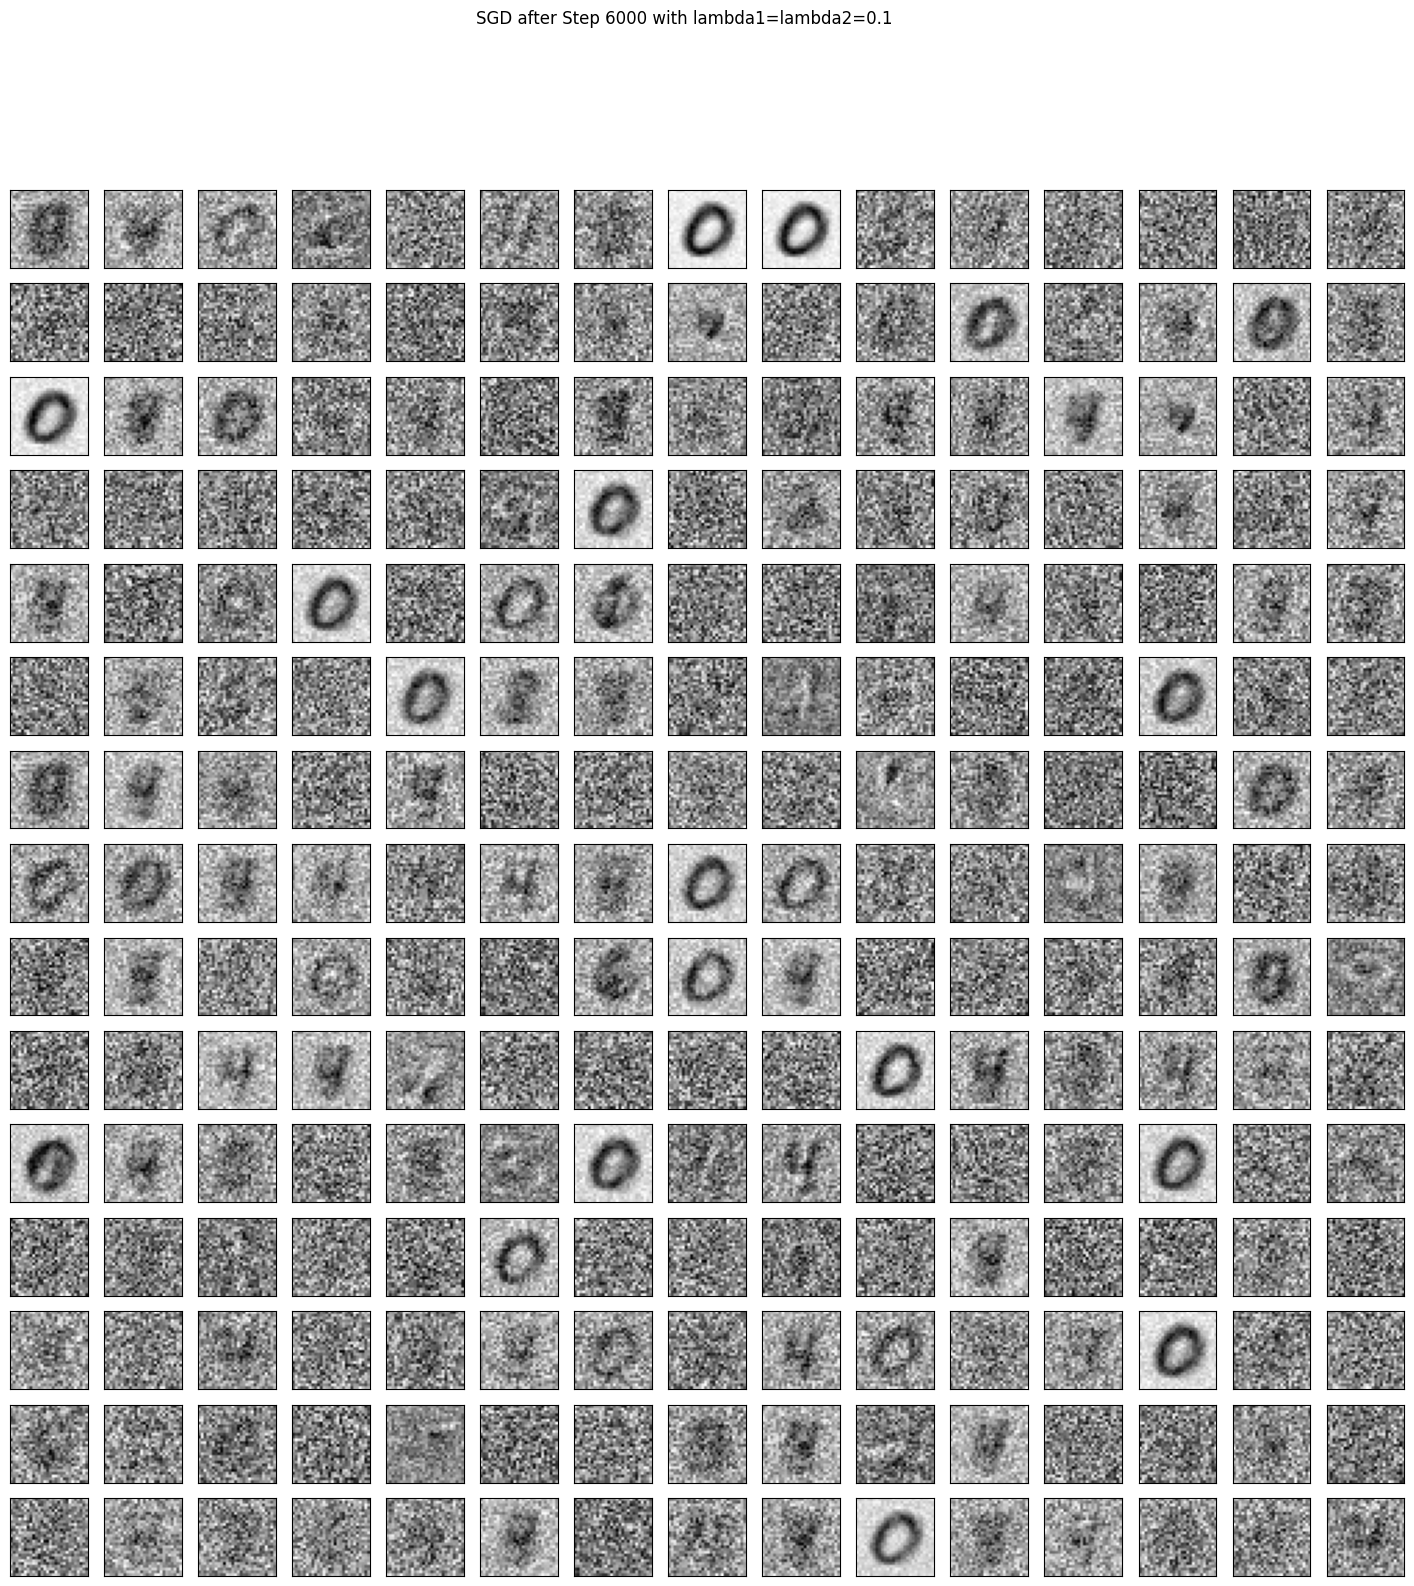

In [9]:
with tf.Session(graph=graph) as session:
    session.run(tf.initialize_all_variables())
    print("Initialized")
    for step in range(num_steps):
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        feed_dict = {tf_train_dataset: batch_data, tf_train_labels: batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), y_valid))

    # Thêm phần này vào cuối khối with
    images = weights1.eval(session=session)
    pylab.figure(figsize=(18, 18))
    indices = np.random.choice(num_hidden_units, 225)
    for j in range(225):
        pylab.subplot(15, 15, j + 1)
        pylab.imshow(np.reshape(images[:, indices[j]], (image_size, image_size)), cmap='gray')
        pylab.xticks([], [])
        pylab.yticks([], [])
    pylab.suptitle('SGD after Step ' + str(step) + ' with lambda1=lambda2=' + str(lambda1))
    pylab.show()

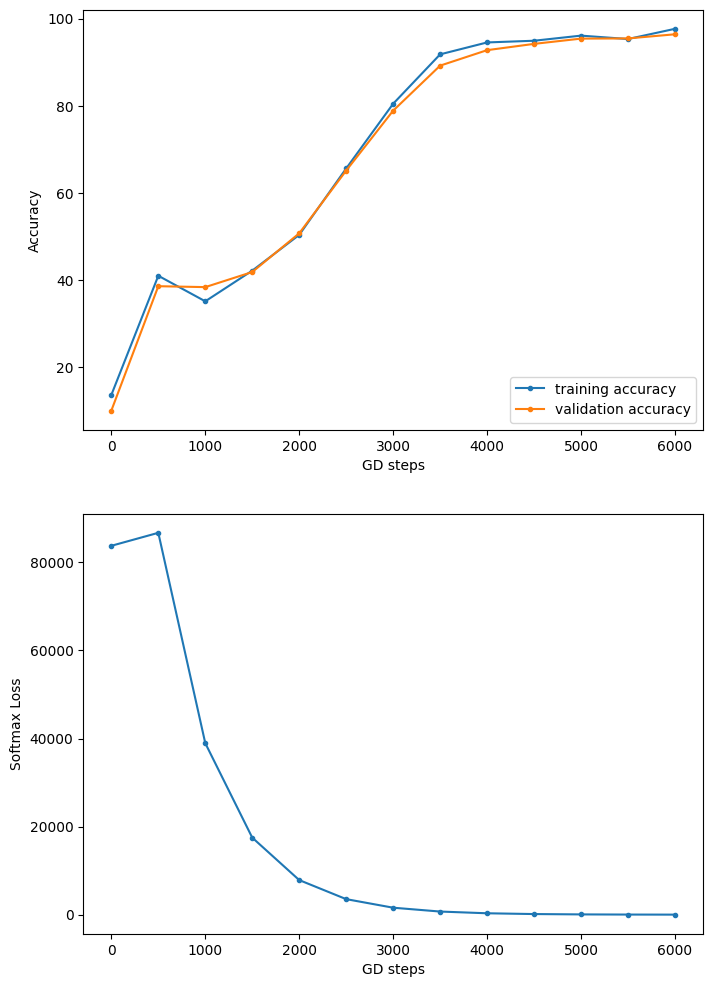

In [12]:
num_points = len(atr)
steps = range(0, num_points * 500, 500)
pylab.figure(figsize=(8, 12))
pylab.subplot(211)
pylab.plot(steps, atr, '.-', label='training accuracy')
pylab.plot(steps, av, '.-', label='validation accuracy')
pylab.xlabel('GD steps')
pylab.ylabel('Accuracy')
pylab.legend(loc='lower right')
pylab.subplot(212)
pylab.plot(steps, ll, '.-')
pylab.xlabel('GD steps')
pylab.ylabel('Softmax Loss')
pylab.show()